<a href="https://colab.research.google.com/github/HyeonhoonLee/TSA_pandas/blob/master/07_Visualizing_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Time Series Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
%matplotlib inline

In [3]:
df_apple = pd.read_csv('data/apple_stock.csv',index_col='Date',parse_dates=True)

In [4]:
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


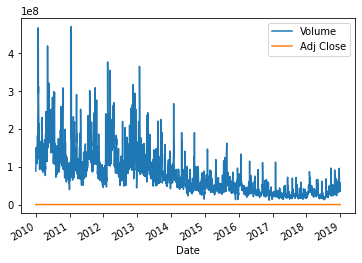

In [5]:
# Adj.Close 와 Adj.Volume 의 variance 문제로 보기 불편함.
df_apple[['Volume','Adj Close']].plot()

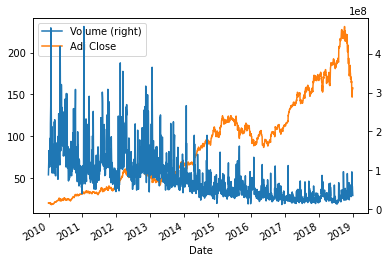

In [6]:
# Adj.Close 와 Adj.Volume 의 축을 함께 그리기
df_apple[['Volume','Adj Close']].plot(secondary_y=['Volume'])

Text(0.5, 1.0, 'Apple')

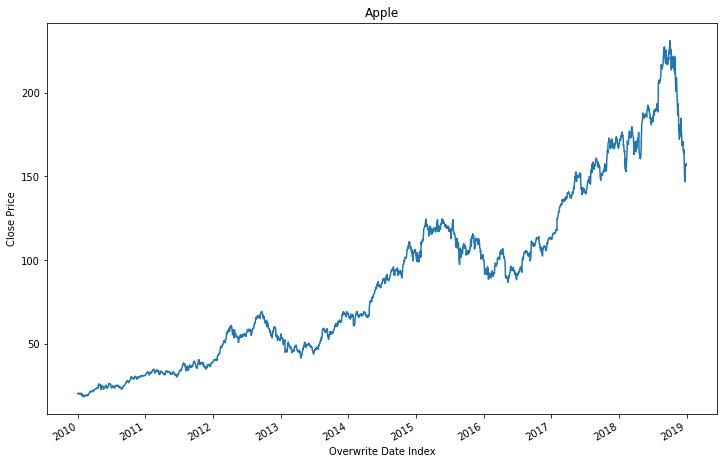

In [7]:
# figsize 조정, ylabel, xlabel, title 추가
df_apple['Adj Close'].plot(figsize=(12,8))
## matplotlib은 한 cell 내에서만 실행해주면 된다.
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date Index')
plt.title('Apple')

# Plot Formatting

## X Limits

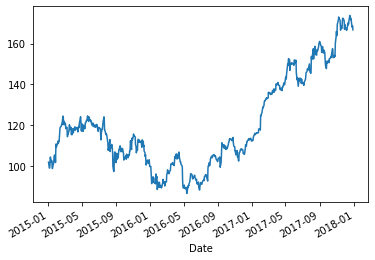

In [8]:
# 기본 pandas으로 그린다면,
df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()

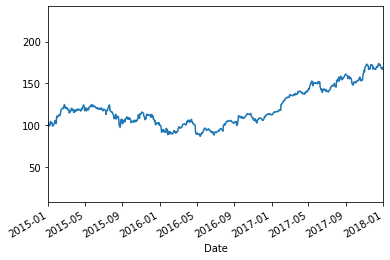

In [9]:
# 이걸 pandas의 plot 기능(xlim)을 이용한다면,
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'])

## Y Limits

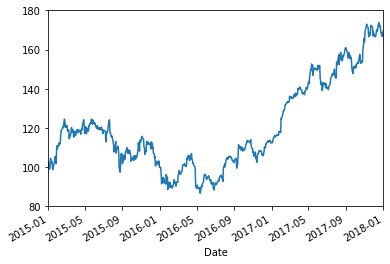

In [10]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],ylim=[80,180])

## Color and Style

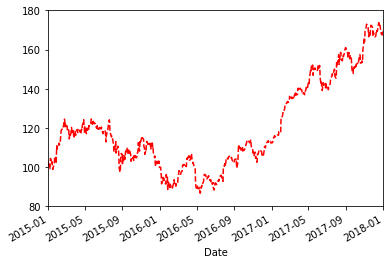

In [11]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],ylim=[80,180],
                         ls='--',c='r')

 ## Basic matplotlib plot

In [12]:
idx = df_apple.loc['2015-01-01':'2018-01-01'].index
stock = df_apple.loc['2015-01-01':'2018-01-01']['Adj Close']

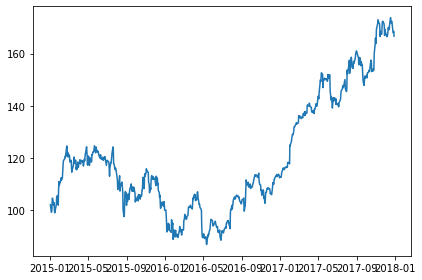

In [13]:
fig, ax = plt.subplots()
ax.plot_date(idx, stock,'-')   #'-' 이렇게 작대기 하나는 line으로 그려주라는 의미.
plt.tight_layout()  # 현재 figure상에서 배치되어 있는 것들의 공백을 적당하게 잘 배치해준다.
plt.show()

## Fix the overlap!

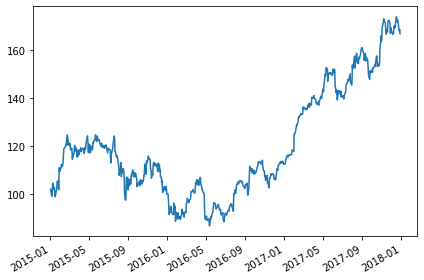

In [14]:
fig, ax = plt.subplots()
ax.plot_date(idx, stock,'-')

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

## Customize grid

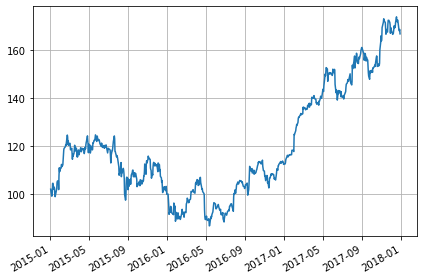

In [15]:
fig, ax = plt.subplots()
ax.plot_date(idx, stock,'-')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

## Format dates on Major Axis

In [ ]:
# 여기서부터 첫 셀에서 import한 dates를 쓴다. (import matplotlib.dates as dates)

In [ ]:
idx = df_apple.loc['2018-01-01':].index
stock = df_apple.loc['2018-01-01':]['Adj Close']

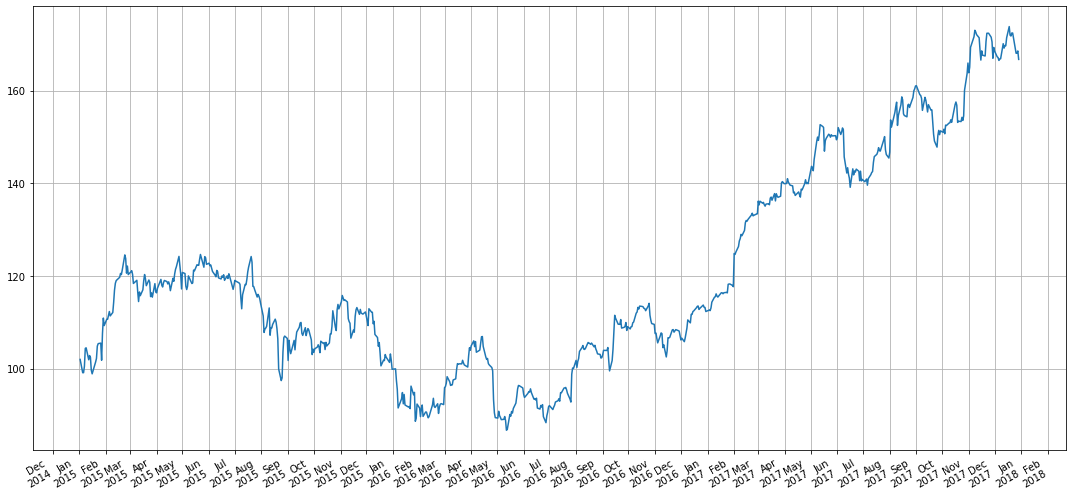

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot_date(idx, stock,'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

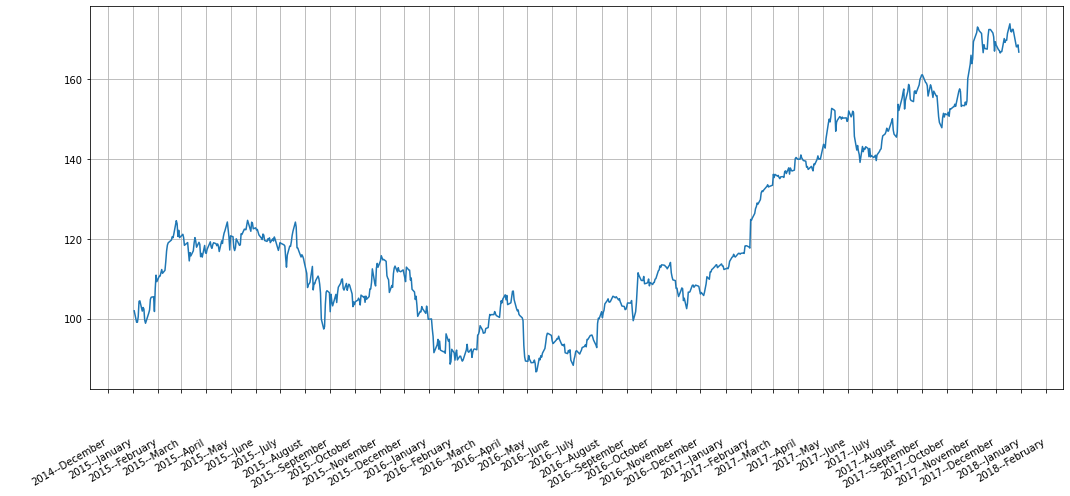

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot_date(idx, stock,'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n\n%Y--%B'))

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

## Minor Axis

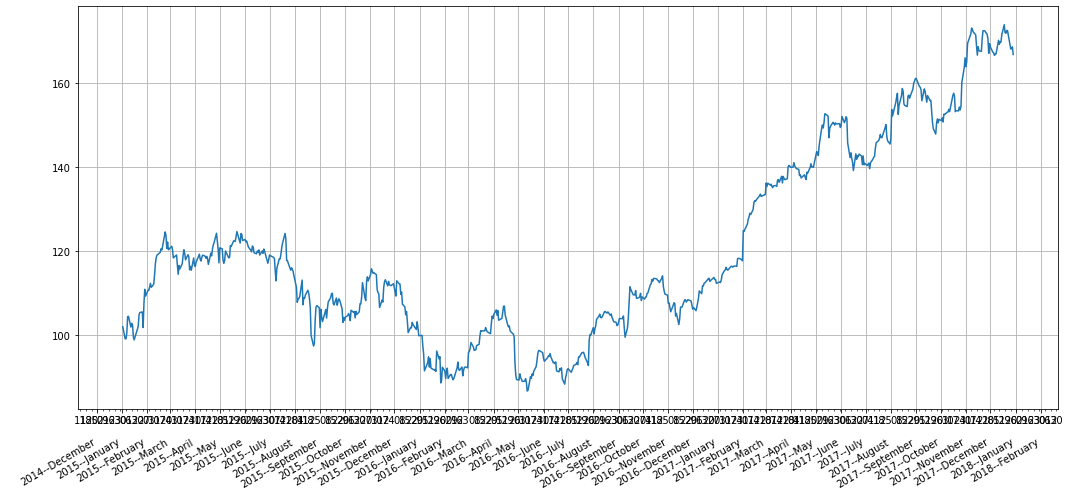

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot_date(idx, stock,'-')


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Minor Axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

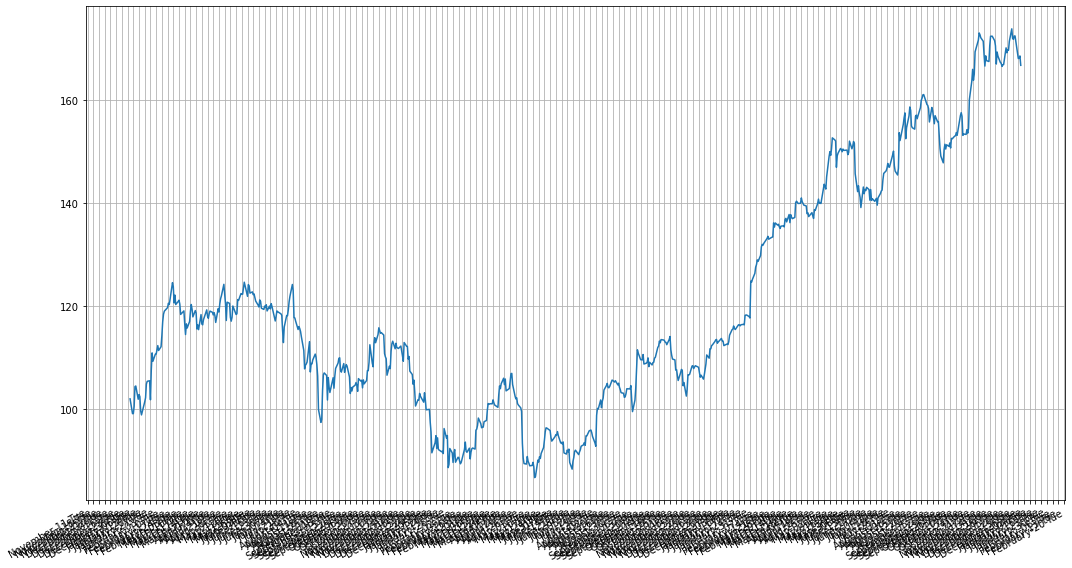

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot_date(idx, stock,'-')


# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%a'))
# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!

plt.tight_layout()
plt.show()